<a href="https://colab.research.google.com/github/marcocucei/TI_I_Practica2/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Marco Antonio Hernández Preciado

**e-mail:** marco.hpreciado@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.
* Visualizar con **plotly**.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [26]:
#Inicializar variables
std_motion_steps = 3
beta = 0.0
m = 3.0
#Exponente de Levy para las curvas
Levy_exponent = [0.5, 1.0, 1.5, 2.0]
resolution = 400

aux_domain = np.linspace(std_motion_steps-5,std_motion_steps+5, resolution)

#Inicializar figura
fig_Levy_pdf = go.Figure()

#Iterar sobre el vector de densidad de probabilidad de Levy
for levy_exponent in Levy_exponent:
  #Calcular la probability density function de la distrib de levy
  levy_pdf = levy_stable.pdf(aux_domain, levy_exponent, beta, loc = m)

#Agregar la curva al grafico
  fig_Levy_pdf.add_trace(go.Scatter(
      x = aux_domain,
      y = levy_pdf,
      marker = dict(size = 2),
      line = dict(width=2),
      mode = 'lines',
      name = 'Levy exponent',
      showlegend = True
  ))
#moostrar
fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.

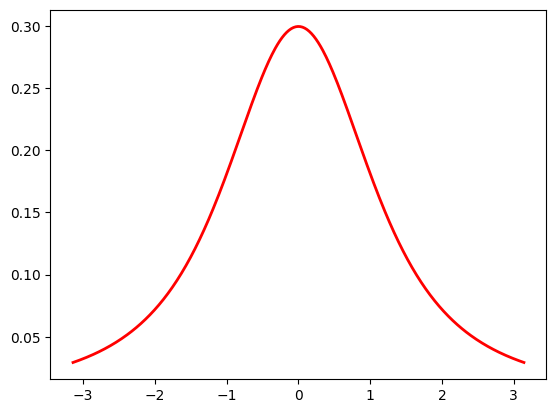

In [36]:
#Parametros de la distribucion de Levy stable
beta = 0.0
levy_exponent = 1.2
resolution = 400

#dominio a evaluar la distribucion de los valores
aux_domain = np.linspace(-np.pi, np.pi, resolution)

#generar datos aleatorios con levy_stable.rvs
levy_data = levy_stable.rvs(levy_exponent, beta, size=resolution)

#obtener la distribucion PDF con Levy stabñe en el dominio
levy_pdf = levy_stable.pdf(aux_domain, levy_exponent, beta)

# Inicializamos la figura y los subplots
plt_figure, subplot = plt.subplots()

# Configuramos el subplot, pasamos los datos de la densidad de probabilidad y creamos el histograma
subplot.plot(aux_domain, levy_pdf, lw=2, label='Curva PDF Lévy Stable', color="red")


# Mostrar el gráfico
plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.